In [79]:
################################
# Solves du/dt = u''           #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display_html


# Problem Parameters
a = 0.
b = 1.
alpha = 1.


def f(t, *x):
    return np.zeros_like(x[0])


def g(t, *x):
    return np.zeros_like(x[0])


def u0(*x):
    return np.prod(np.sin(np.pi * np.asarray(x)), axis=0)


def exact(t, *x):
    return np.exp(- np.pi ** 2 * alpha * t) * np.prod(np.sin(np.pi * np.asarray(x)), axis=0)

In [80]:
# Parameters
d = 1
k = 2
delta = 0.5
N = 100
tn = 50
tf = 1.

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)
Lidx = lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0)
Bidx = lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0)


L = lambda func: lambda *x: - alpha * func.laplacian(*x)
B = lambda func: lambda *x: func(*x)

# Solve for approximate solution
phi = rad.Wendland(d, k, delta, xc)
solver = rad.solve.MOLCollocation(phi, L, Lidx, B, Bidx, tf, tn)
approx = solver.solve(f, g, u0)

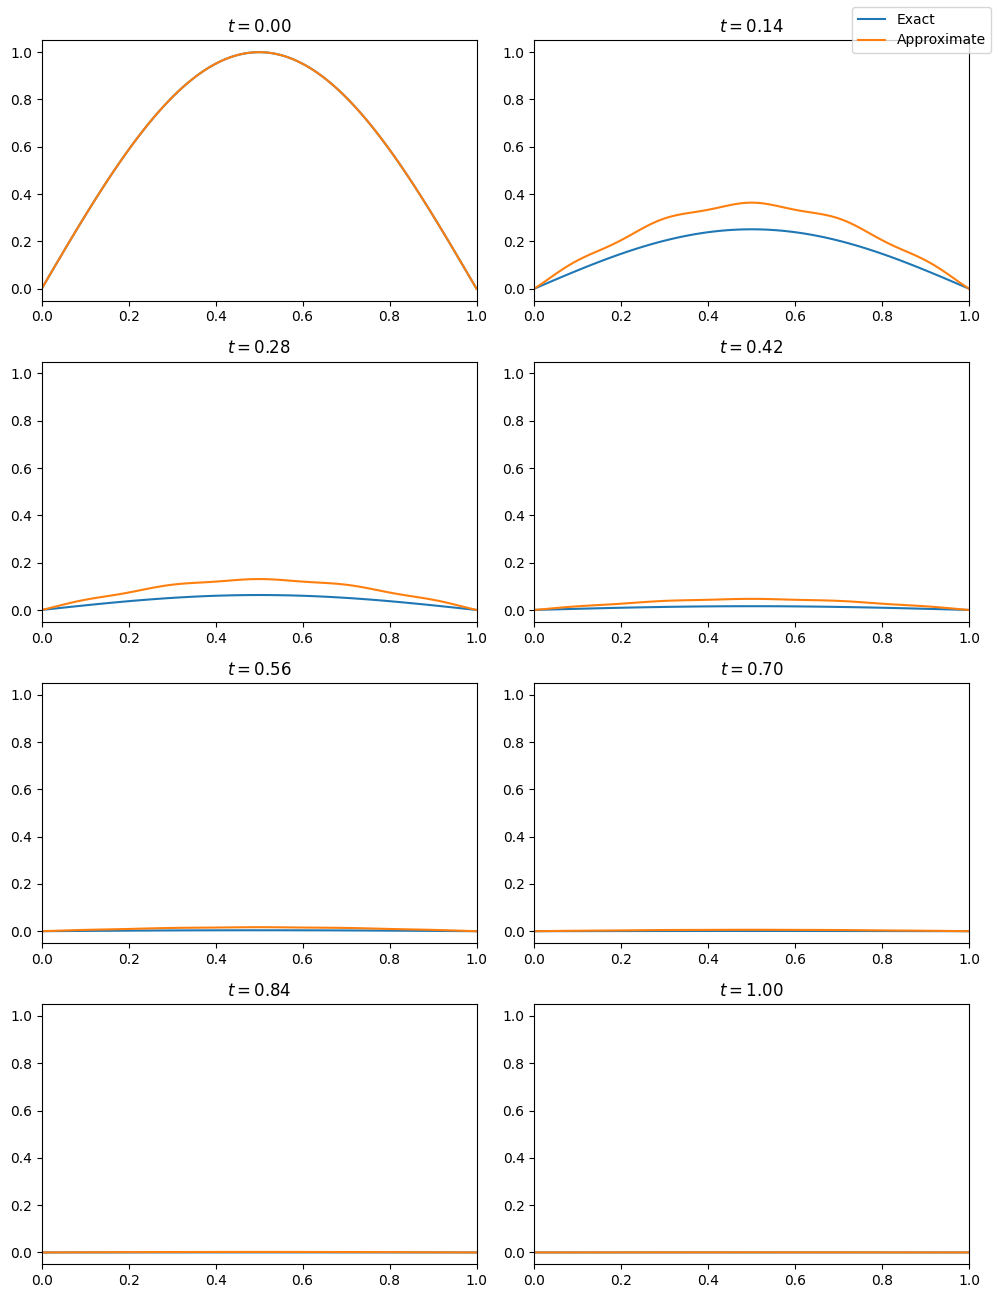

In [86]:
fig, axs = plt.subplots(4, 2, figsize=(10, 13))

x = np.linspace(a, b, 100)

n = np.size(axs)

for i, ax in enumerate(axs.flat):
    ax.margins(x=0.)
    ax.set_ylim(0. - plt.rcParams["axes.ymargin"], 1. + plt.rcParams["axes.ymargin"])
    
    idx = int((i / (n - 1)) * tn)
        
    ax.plot(x, exact(idx * solver.dt, x), label="Exact")
    ax.plot(x, approx(idx, x), label="Approximate")
    
    ax.set_title(f"$t = {idx * solver.dt:.2f}$")
    
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels)
plt.tight_layout()
plt.savefig("figures/c6-mol-heat.pdf")

In [82]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.margins(x=0.)

x = np.linspace(a, b, 100)
exact_line, = ax.plot(x, exact(0, x), label="Exact")
approx_line, = ax.plot(x, approx(0, x), label="Approximate")
plt.legend()

def func(i):
    approx_line.set_ydata(approx(i, x))
    exact_line.set_ydata(exact(solver.dt * i, x))
    return approx_line, exact_line,


anim = animation.FuncAnimation(
    fig,
    func,
    frames=range(0, len(approx)),
    interval=200,
    blit=True,
    repeat=True
)

display_html(HTML(anim.to_jshtml()))
plt.close()

Once 
 
 Loop 
 
 Reflect

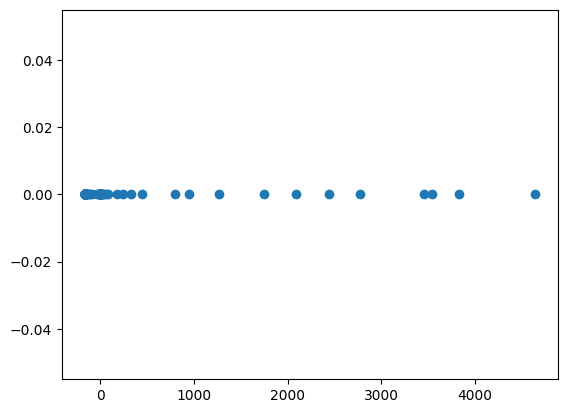

In [83]:
evals = np.linalg.eigvals(solver.mat)
plt.scatter(np.real(evals), np.imag(evals))
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)
plt.show()